In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import print_function
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from datetime import datetime
import os

%matplotlib inline
%config InlineBackend.figure_format = 'png'
pd.set_option("max_columns",50)

In [3]:
%%time
train = pd.read_csv("../data/train_2013.csv", index_col=0)
train = train.reset_index(drop=True)
train = train[train["is_booking"] == 1]
np.random.seed(402)
train = train.ix[np.random.choice(train.index, 50000)]
train = train.reset_index(drop=True)


Wall time: 43.3 s


In [4]:
use_col = ["srch_co","srch_ci","user_location_region",\
               "hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","srch_children_cnt","hotel_cluster"]

In [5]:
train_y = train[["hotel_cluster"]]

In [6]:
train_x = train[use_col]

In [8]:
train_x["srch_ci"] = pd.to_datetime(train_x["srch_ci"], errors="coerce")
train_x["srch_co"] = pd.to_datetime(train_x["srch_co"], errors="coerce")

C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
train_x["period"] = train_x["srch_co"] - train_x["srch_ci"]

C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
train_x["period"] = (train_x["period"] / np.timedelta64(1, 'D')).astype(int)

C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
train_x = train_x.drop(["srch_co","srch_ci"], axis=1)

In [29]:
train_x["srch_adults_cnt"].value_counts()

2    27226
1    17543
3     2219
4     2132
6      334
5      269
0      113
8       92
7       54
9       18
Name: srch_adults_cnt, dtype: int64

In [34]:
train_x.tail()

,user_location_region,user_location_region,hotel_market,srch_destination_id,hotel_country,srch_adults_cnt,srch_children_cnt,hotel_cluster,period
49995,790,790,1447,8823,0,1,0,8,9
49996,448,448,696,8271,50,2,0,68,2
49997,403,403,438,11993,50,4,0,15,1
49998,824,824,1108,21816,63,2,1,98,2
49999,50,50,772,20001,105,2,1,22,2


In [36]:
train_x["num"] = 1

C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
pd.pivot_table(train_x, values='num', index=['srch_adults_cnt'], columns=['srch_children_cnt'], aggfunc=np.sum)

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,112.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13900.0,3338.0,251.0,50.0,1.0,1.0,1.0,1.0,NaN,NaN
2,19629.0,5024.0,2253.0,263.0,51.0,2.0,3.0,NaN,1.0,NaN
3,1443.0,593.0,115.0,49.0,15.0,3.0,NaN,NaN,NaN,1.0
4,1438.0,420.0,171.0,55.0,42.0,3.0,1.0,1.0,1.0,NaN
5,191.0,45.0,21.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN
6,238.0,59.0,19.0,7.0,3.0,4.0,3.0,1.0,NaN,NaN
7,38.0,11.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
8,69.0,12.0,2.0,2.0,4.0,1.0,1.0,NaN,1.0,NaN


In [43]:
train_x["srch_adults_cnt"] = train_x["srch_adults_cnt"].apply(lambda x: 3 if x>=3 else x)
# 3은 가족여행 나머지는 1(혼자) 2(이건 애매함)

C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
train_x = train_x.drop(["num","srch_children_cnt"], axis=1)

In [60]:
train_x.tail()

,hotel_market,srch_destination_id,hotel_country,srch_adults_cnt,hotel_cluster,period
49995,1447,8823,0,1,8,9
49996,696,8271,50,2,68,2
49997,438,11993,50,3,15,1
49998,1108,21816,63,2,98,2
49999,772,20001,105,2,22,2


In [61]:
train_x["srch_destination_id"].value_counts()

8250     1825
8267      945
12206     492
8253      470
8279      470
8745      384
8268      372
8230      364
8791      358
8260      313
8254      302
8291      294
7635      287
8788      273
8223      266
8278      262
8746      260
8220      258
8242      251
8819      237
669       210
468       209
8747      204
26022     199
8287      198
8213      195
8288      192
12603     189
8266      185
8282      183
         ... 
26333       1
26365       1
44804       1
28476       1
18009       1
42821       1
1905        1
22395       1
44932       1
24474       1
34721       1
1681        1
7762        1
5395        1
23962       1
15670       1
13655       1
23898       1
42341       1
23930       1
5523        1
26013       1
30239       1
3536        1
24026       1
22011       1
34305       1
5651        1
26141       1
12294       1
Name: srch_destination_id, dtype: int64

In [65]:
train_x["num"] = 1

In [70]:
pd.pivot_table(train_x, values='num', index=['srch_adults_cnt'], columns=['period'], aggfunc=np.sum)

period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28
srch_adults_cnt,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14.0,10.0,18.0,30.0,9.0,8.0,15.0,1.0,2.0,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8045.0,3892.0,2432.0,1387.0,742.0,384.0,292.0,102.0,58.0,49.0,41.0,24.0,26.0,22.0,9.0,4.0,4.0,6.0,5.0,5.0,5.0,1.0,1.0,NaN,3.0,1.0,3.0
2,11045.0,5950.0,4092.0,2509.0,1400.0,776.0,762.0,233.0,138.0,116.0,48.0,37.0,31.0,42.0,12.0,3.0,5.0,3.0,5.0,6.0,6.0,1.0,NaN,1.0,NaN,1.0,4.0
3,2030.0,1178.0,819.0,493.0,224.0,121.0,140.0,37.0,26.0,19.0,7.0,9.0,2.0,5.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


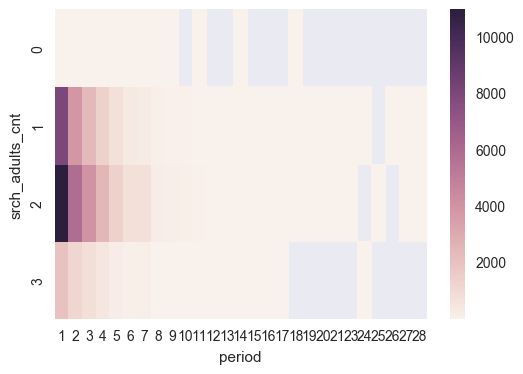

In [75]:
sns.heatmap(pd.pivot_table(train_x, values='num', index=['srch_adults_cnt'], columns=['period'], aggfunc=np.sum))

In [77]:
train_x = train_x.drop(["num"], axis=1)

In [93]:
train_x = train_x[["hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","period","user_location_region"]]

In [91]:
train_y.head()

,hotel_cluster
0,15
1,72
2,58
3,56
4,42


In [97]:
%%time
use_col = ["srch_co","srch_ci","user_location_region",\
               "hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","srch_children_cnt"]
print("read the test.csv")
test = pd.read_csv("../data/test.csv")
test = test[use_col]

test["srch_ci"] = pd.to_datetime(test["srch_ci"], errors="coerce")
test["srch_co"] = pd.to_datetime(test["srch_co"], errors="coerce")
test["period"] = test["srch_co"] - test["srch_ci"]
test["period"] = (test["period"] / np.timedelta64(1, 'D')).astype(int)
test = test.drop(["srch_co","srch_ci"], axis=1)
test["num"] = 1
test["srch_adults_cnt"] = test["srch_adults_cnt"].apply(lambda x: 3 if x>=3 else x)
test = test.drop(["num","srch_children_cnt"], axis=1)

test = test[["hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","period","user_location_region"]]

print("modeling strart")
model = RandomForestClassifier(n_estimators=10, max_depth=7, n_jobs=-1, random_state=777)
print('='*50)
print('# Test shape : {}'.format(test.shape))

model.fit(train,train_y)

preds = model.predict_proba(test)
preds = np.fliplr(np.argsort(preds, axis=1))

print("save file")

result_df = pd.DataFrame([ " ".join(row) for row in preds[:,:5].astype(str)], columns=["hotel_cluster"])
result_df.index.names = ["id"]
file_name = datetime.now().strftime("result_%Y%m%d%H%M%S") + '.csv'
result_df.to_csv(os.path.join('../output',file_name), index=True)

read the test.csv


ValueError: Cannot convert NA to integer

In [96]:
test

,srch_co,srch_ci,user_location_region,hotel_market,srch_destination_id,hotel_country,srch_adults_cnt,srch_children_cnt,period
0,2016-05-23,2016-05-19,174,27,12243,204,2,0,4 days
1,2016-05-15,2016-05-12,174,1540,14474,204,2,0,3 days
2,2015-07-27,2015-07-26,142,699,11353,50,4,0,1 days
3,2015-09-16,2015-09-14,258,628,8250,50,2,0,2 days
4,2015-07-23,2015-07-22,467,538,11812,50,2,0,1 days
5,2015-07-24,2015-07-22,311,447,11827,50,4,0,2 days
6,2015-08-03,2015-08-02,311,696,8271,50,2,0,1 days
7,2015-08-04,2015-08-03,348,191,8291,50,2,0,1 days
8,2015-12-31,2015-12-30,311,628,8250,50,2,0,1 days
9,2016-01-03,2016-01-02,311,364,9145,50,2,0,1 days


In [140]:
%%time
use_col = ["srch_co","srch_ci","user_location_region",\
               "hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","srch_children_cnt"]
print("read the test.csv")
test = pd.read_csv("../data/test.csv")
test = test[use_col]

test["srch_ci"] = pd.to_datetime(test["srch_ci"], errors="coerce")
test["srch_co"] = pd.to_datetime(test["srch_co"], errors="coerce")
test["period"] = test["srch_co"] - test["srch_ci"]
test["period"] = (test["period"] / np.timedelta64(1, 'D')).fillna(0.0).astype(int)
test = test.drop(["srch_co","srch_ci"], axis=1)
test["num"] = 1
test["srch_adults_cnt"] = test["srch_adults_cnt"].apply(lambda x: 3 if x>=3 else x)
test = test.drop(["num","srch_children_cnt"], axis=1)

test = test[["hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","period","user_location_region"]]

print("modeling strart")
model = RandomForestClassifier(n_estimators=10, max_depth=7, n_jobs=-1, random_state=777)
print('='*50)
print('# Test shape : {}'.format(test.shape))

model.fit(train_x,train_y)

preds = model.predict_proba(test)
preds = np.fliplr(np.argsort(preds, axis=1))

print("save file")

result_df = pd.DataFrame([ " ".join(row) for row in preds[:,:5].astype(str)], columns=["hotel_cluster"])
result_df.index.names = ["id"]
file_name = datetime.now().strftime("result_%Y%m%d%H%M%S") + '.csv'
result_df.to_csv(os.path.join('../output',file_name), index=True)

read the test.csv
modeling strart
# Test shape : (2528243, 6)


C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


save file
Wall time: 12min 1s


## public score : 0.16293


In [141]:
result_df

,hotel_cluster
id,
0,25 64 5 46 2
1,82 62 67 30 61
2,91 42 48 18 16
3,1 79 45 54 24
4,91 48 42 95 1
5,91 48 42 95 1
6,91 18 95 42 48
7,91 18 95 48 59
8,1 79 45 54 24


### 안되겠다 트리50개로 해봐야지
csv로 뽑고 => h2o.ai에서 진행


In [ ]:
%%time
use_col = ["srch_co","srch_ci","user_location_region",\
               "hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","srch_children_cnt"]
print("read the test.csv")
test = pd.read_csv("../data/test.csv")
test = test[use_col]

test["srch_ci"] = pd.to_datetime(test["srch_ci"], errors="coerce")
test["srch_co"] = pd.to_datetime(test["srch_co"], errors="coerce")
test["period"] = test["srch_co"] - test["srch_ci"]
test["period"] = (test["period"] / np.timedelta64(1, 'D')).fillna(0.0).astype(int)
test = test.drop(["srch_co","srch_ci"], axis=1)
test["num"] = 1
test["srch_adults_cnt"] = test["srch_adults_cnt"].apply(lambda x: 3 if x>=3 else x)
test = test.drop(["num","srch_children_cnt"], axis=1)

test = test[["hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","period","user_location_region"]]

print("modeling strart")
model = RandomForestClassifier(n_estimators=10, max_depth=7, n_jobs=-1, random_state=777)
print('='*50)
print('# Test shape : {}'.format(test.shape))

model.fit(train_x,train_y)

preds = model.predict_proba(test)
preds = np.fliplr(np.argsort(preds, axis=1))

print("save file")

result_df = pd.DataFrame([ " ".join(row) for row in preds[:,:5].astype(str)], columns=["hotel_cluster"])
result_df.index.names = ["id"]
file_name = datetime.now().strftime("result_%Y%m%d%H%M%S") + '.csv'
result_df.to_csv(os.path.join('../output',file_name), index=True)

In [148]:
train_sum = pd.concat([train_x,train_y], axis=1)

In [149]:
train_sum.to_csv("train_data.csv")
test.to_csv("test_data.csv")

In [1]:
# 하나로 정리

In [ ]:
%%time

print('preprocessing train_data')
use_col = ["srch_co","srch_ci","user_location_region",\
               "hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","srch_children_cnt","hotel_cluster"]

train_y = train[["hotel_cluster"]]

train_x = train[use_col]
train_x["srch_ci"] = pd.to_datetime(train_x["srch_ci"], errors="coerce")
train_x["srch_co"] = pd.to_datetime(train_x["srch_co"], errors="coerce")
train_x["period"] = train_x["srch_co"] - train_x["srch_ci"]
train_x["period"] = (train_x["period"] / np.timedelta64(1, 'D')).astype(int)
train_x = train_x.drop(["srch_co","srch_ci"], axis=1)
train_x["srch_adults_cnt"] = train_x["srch_adults_cnt"].apply(lambda x: 3 if x>=3 else x)
train_x = train_x.drop(["srch_children_cnt"], axis=1)
train_x = train_x[["hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","period","user_location_region"]]



use_col = ["srch_co","srch_ci","user_location_region",\
               "hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","srch_children_cnt"]
print("read the test.csv")
test = pd.read_csv("../data/test.csv")
test = test[use_col]

print("preprocessing test_data")

test["srch_ci"] = pd.to_datetime(test["srch_ci"], errors="coerce")
test["srch_co"] = pd.to_datetime(test["srch_co"], errors="coerce")
test["period"] = test["srch_co"] - test["srch_ci"]
test["period"] = (test["period"] / np.timedelta64(1, 'D')).fillna(0.0).astype(int)
test = test.drop(["srch_co","srch_ci"], axis=1)
test["num"] = 1
test["srch_adults_cnt"] = test["srch_adults_cnt"].apply(lambda x: 3 if x>=3 else x)
test = test.drop(["num","srch_children_cnt"], axis=1)

test = test[["hotel_market","srch_destination_id","hotel_country","srch_adults_cnt","period","user_location_region"]]

print("modeling strart")
model = RandomForestClassifier(n_estimators=10, max_depth=7, n_jobs=-1, random_state=777)
print('='*50)
print('# Test shape : {}'.format(test.shape))

model.fit(train_x,train_y)

preds = model.predict_proba(test)
preds = np.fliplr(np.argsort(preds, axis=1))

print("save file")

result_df = pd.DataFrame([ " ".join(row) for row in preds[:,:5].astype(str)], columns=["hotel_cluster"])
result_df.index.names = ["id"]
file_name = datetime.now().strftime("result_%Y%m%d%H%M%S") + '.csv'
result_df.to_csv(os.path.join('../output',file_name), index=True)

In [8]:
train[["srch_children_cnt","srch_adults_cnt"]].groupby(["srch_children_cnt"]).agg

,srch_adults_cnt
srch_children_cnt,
0,66557
1,17615
2,6042
3,1046
4,401
5,70
6,46
7,11
8,14


In [10]:
from csv import DictReader
from collections import defaultdict
from datetime import datetime

start = datetime.now()

def get_top5(d):
    return " ".join(sorted(d, key=d.get, reverse=True)[:5])

destination_clusters = defaultdict(lambda: defaultdict(int))

for i, row in enumerate(DictReader(open("../data/train.csv"))):
	destination_clusters[row["srch_destination_id"]][row["hotel_cluster"]] += 1
	if i % 1000000 == 0:
		print("%s\t%s"%(i, datetime.now() - start))

most_frequent = defaultdict(str)

for k in destination_clusters:
	most_frequent[k] = get_top5(destination_clusters[k])

with open("pred_sub.csv", "w") as outfile:
	outfile.write("id,hotel_cluster\n")
	for i, row in enumerate(DictReader(open("../data/test.csv"))):
		outfile.write("%d,%s\n"%(i,most_frequent[row["srch_destination_id"]]))
		if i % 1000000 == 0:
			print("%s\t%s"%(i, datetime.now() - start))

0	0:00:00.032000
1000000	0:00:08.536000
2000000	0:00:16.857000
3000000	0:00:25.250000
4000000	0:00:33.751000
5000000	0:00:42.339000
6000000	0:00:50.776000
7000000	0:00:59.239000
8000000	0:01:07.823000
9000000	0:01:16.249000
10000000	0:01:24.588000
11000000	0:01:32.984000
12000000	0:01:41.549000
13000000	0:01:50.041000
14000000	0:01:58.427000
15000000	0:02:06.812000
16000000	0:02:15.193000
17000000	0:02:23.633000
18000000	0:02:31.937000
19000000	0:02:40.275000
20000000	0:02:48.656000
21000000	0:02:57.063000
22000000	0:03:05.426000
23000000	0:03:15.156000
24000000	0:03:23.927000
25000000	0:03:32.309000
26000000	0:03:41.202000
27000000	0:03:49.622000
28000000	0:03:58.008000
29000000	0:04:06.977000
30000000	0:04:15.666000
31000000	0:04:24.836000
32000000	0:04:34.716000
33000000	0:04:43.532000
34000000	0:04:52.305000
35000000	0:05:00.588000
36000000	0:05:08.876000
37000000	0:05:17.220000
0	0:05:23.496000
1000000	0:05:33.737000
2000000	0:05:44.842000
